# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def style_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number): 
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="Percentage":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass
            
    return df_color

def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

# Import Dataset German Credit

In [ ]:
#Memasukkan database ke colab 
df= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",
         "Purpose","Credit amount","Savings account/bonds","Present employment since",
         "Installment rate in percentage of disposable income","Personal status and sex",
         "Other debtors / guarantors","Present residence since","Property","Age in years",
        "Other installment plans","Housing","Number of existing credits at this bank",
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns= headers
df.to_csv("german_data_credit_cat.csv",index=False)

#Menstrukturkan database berdasarkan attribute
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 
         'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

# Menampilkan Dataframe

In [ ]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Risk
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,4,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Risk
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,4,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Risk
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Risk


**Menampilkan 5 data pertama**

In [ ]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


**Menampilkan 5 data terakhir**

In [ ]:
df.tail()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Risk
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,4,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Risk
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,4,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Risk
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Risk
999,0 <= <200 DM,45,critical account,car (used),4576,100 <= <500 DM,unemployed,3,male:single,none,4,car or other,27,none,own,1,skilled employee / official,1,none,yes,Good Risk


**Menampilkan 5 data acak**

In [ ]:
df.sample(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
523,no checking account,24,existing credits paid back duly till now,car (used),3488,100 <= <500 DM,4<= <7 years,3,female:divorced/separated/married,none,4,car or other,23,none,own,1,skilled employee / official,1,none,yes,Good Risk
177,<0 DM,6,critical account,radio/television,338,500 <= < 1000 DM,>=7 years,4,male:single,none,4,car or other,52,none,own,2,skilled employee / official,1,none,yes,Good Risk
150,no checking account,6,existing credits paid back duly till now,radio/television,1346,100 <= <500 DM,>=7 years,2,male:single,none,4,unknown / no property,42,bank,for free,1,skilled employee / official,2,yes,yes,Good Risk
53,no checking account,18,existing credits paid back duly till now,car (used),3378,no savings account,1<= < 4 years,2,male:single,none,1,savings agreement/life insurance,31,none,own,1,skilled employee / official,1,yes,yes,Good Risk
958,<0 DM,28,existing credits paid back duly till now,car (new),4006,<100 DM,1<= < 4 years,3,male:single,none,2,car or other,45,none,own,1,unskilled - resident,1,none,yes,Bad Risk


**Tipe setiap dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [ ]:
#menghapuskan (drop) columns yang merupakan numerical variable
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#Memberikan dan meng-highlight persentase bad risk pada credit (dalam tabel) berserta attribut
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))

,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30.000000,70.000000
2,Number of people being liable to provide maintenance for,1.000000,2.000000
3,Percentage,84.500000,15.500000
4,Telephone,none,yes
5,Percentage,59.600000,40.400000
6,foreign worker,no,yes
7,Percentage,3.700000,96.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Housing,for free,own,rent
1,Percentage,10.800000,71.300000,17.900000
2,Other debtors / guarantors,co-applicant,guarantor,none
3,Percentage,4.100000,5.200000,90.700000
4,Other installment plans,bank,none,store
5,Percentage,13.900000,81.400000,4.700000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1.000000,2.000000,3.000000,4.000000
1,Percentage,13.600000,23.100000,15.700000,47.600000
2,Job,management/ highly qualified employee,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident
3,Percentage,14.800000,63.000000,2.200000,20.000000
4,Number of existing credits at this bank,1.000000,2.000000,3.000000,4.000000
5,Percentage,63.300000,33.300000,2.800000,0.600000
6,Personal status and sex,female:divorced/separated/married,male:divorced/separated,male:married/widowed,male:single
7,Percentage,31.000000,5.000000,9.200000,54.800000
8,Present residence since,1.000000,2.000000,3.000000,4.000000
9,Percentage,13.000000,30.800000,14.900000,41.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5
0,Credit history,all credits at this bank paid back duly,critical account,delay in paying off,existing credits paid back duly till now,no credits taken
1,Percentage,4.900000,29.300000,8.800000,53.000000,4.000000
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years,unemployed
3,Percentage,33.900000,17.400000,17.200000,25.300000,6.200000
4,Savings account/bonds,100 <= <500 DM,500 <= < 1000 DM,<100 DM,>= 1000 DM,no savings account
5,Percentage,10.300000,6.300000,60.300000,4.800000,18.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5,Category Option 6,Category Option 7,Category Option 8,Category Option 9,Category Option 10
0,Purpose,business,car (new),car (used),domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
1,Percentage,9.700000,23.400000,10.300000,1.200000,5.000000,18.100000,1.200000,28.000000,2.200000,0.900000


Untuk memudahkan pada saat testing, maka beberapa atribut akan digabung 

**Other debtors / guarantors : 1) co-applicant/guarantor 2) None**

**Other installment plans : 1) bank/store 2) None**

**Job : 1) Employed 2) Unemployed**

**Number of existing credits at this bank : 1) One 2) More than one**

**Personal status and sex : 1) Male 2) Female**

**Status of existing checking account : 1) no checking account 2) < 0 DM 3) > 0 DM**

**Credit history: 1) all credit / existing credits paid back duly till now 2) no credits taken 3) critical account/delay in paying off**

**Savings account/bonds: 1) <100 DM 2) < 500 DM 3) > 500 DM 4) no savings account**

**Purpose: 1) New car 2) Used car 3) Home Related 4) Other**

**Present employment since: 1) < 1 years /unemployed 2) 1<= < 4 years 3) 4< = <7 years 4) >=7 years**

In [ ]:
df=pd.read_csv("german_data_credit_cat.csv")
number_of_credit={1:1,2:2,3:2,4:2}
df["Number of existing credits at this bank"]=df["Number of existing credits at this bank"].map(number_of_credit)


Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': ">0 DM",'A13':">0 DM"}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)


Credit_history={"A34":"critical account/delay in paying off","A33":"critical account/delay in paying off","A32":"all credit / existing credits paid back duly till now","A31":"all credit / existing credits paid back duly till now","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)
Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "Home Related", "A43" :"Home Related" , "A44" : "Home Related", "A45" : "Home Related", "A46" : "others", 'A47' : 'others','A48' : 'others','A49' : 'others','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)


Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "<500 DM","A63" :">500 DM", "A64" :">500 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

          
Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"<1 years"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)


Personal_status_and_sex={ 'A95':"female",'A94':"male",'A93':"male", 'A92':"female", 'A91':"male"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant/guarantor", 'A103':"co-applicant/guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"bank/store", 'A141':"bank/store"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"employed", 'A173':"employed", 'A172':"unemployed", 'A171':"unemployed"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

**Menampilkan Dataframe**

In [ ]:
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account/delay in paying off,Home Related,1169,no savings account,>=7 years,4,male,none,4,real estate,67,none,own,2,employed,1,yes,yes,Good Risk
1,>0 DM,48,all credit / existing credits paid back duly t...,Home Related,5951,<100 DM,1<= < 4 years,2,female,none,2,real estate,22,none,own,1,employed,1,none,yes,Bad Risk
2,no checking account,12,critical account/delay in paying off,others,2096,<100 DM,4<= <7 years,2,male,none,3,real estate,49,none,own,1,unemployed,2,none,yes,Good Risk
3,<0 DM,42,all credit / existing credits paid back duly t...,Home Related,7882,<100 DM,4<= <7 years,2,male,co-applicant/guarantor,4,savings agreement/life insurance,45,none,for free,1,employed,2,none,yes,Good Risk
4,<0 DM,24,critical account/delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male,none,4,unknown / no property,53,none,for free,2,employed,2,none,yes,Bad Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,all credit / existing credits paid back duly t...,Home Related,1736,<100 DM,4<= <7 years,3,female,none,4,real estate,31,none,own,1,unemployed,1,none,yes,Good Risk
996,<0 DM,30,all credit / existing credits paid back duly t...,car (used),3857,<100 DM,1<= < 4 years,4,male,none,4,savings agreement/life insurance,40,none,own,1,employed,1,yes,yes,Good Risk
997,no checking account,12,all credit / existing credits paid back duly t...,Home Related,804,<100 DM,>=7 years,4,male,none,4,car or other,38,none,own,1,employed,1,none,yes,Good Risk
998,<0 DM,45,all credit / existing credits paid back duly t...,Home Related,1845,<100 DM,1<= < 4 years,4,male,none,4,unknown / no property,23,none,for free,1,employed,1,yes,yes,Bad Risk


In [ ]:
#menghapuskan (drop) columns yang merupakan numerical variable
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#Memberikan dan meng-highlight persentase bad risk pada credit (dalam tabel) berserta attribut
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))

,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30.000000,70.000000
2,Job,employed,unemployed
3,Percentage,77.800000,22.200000
4,Number of existing credits at this bank,1.000000,2.000000
5,Percentage,63.300000,36.700000
6,Number of people being liable to provide maintenance for,1.000000,2.000000
7,Percentage,84.500000,15.500000
8,Other debtors / guarantors,co-applicant/guarantor,none
9,Percentage,9.300000,90.700000


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Credit history,all credit / existing credits paid back duly till now,critical account/delay in paying off,no credits taken
1,Percentage,57.900000,38.100000,4.000000
2,Housing,for free,own,rent
3,Percentage,10.800000,71.300000,17.900000
4,Status of existing checking account,<0 DM,>0 DM,no checking account
5,Percentage,27.400000,33.200000,39.400000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1.000000,2.000000,3.000000,4.000000
1,Percentage,13.600000,23.100000,15.700000,47.600000
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years
3,Percentage,33.900000,17.400000,23.400000,25.300000
4,Present residence since,1.000000,2.000000,3.000000,4.000000
5,Percentage,13.000000,30.800000,14.900000,41.300000
6,Property,car or other,real estate,savings agreement/life insurance,unknown / no property
7,Percentage,33.200000,28.200000,23.200000,15.400000
8,Purpose,Home Related,car (new),car (used),others
9,Percentage,49.500000,23.400000,10.300000,16.800000


**Melihatkan Numerical Variable**

In [ ]:
df[["Credit amount","Age in years","Duration in month"]].describe()

,Credit amount,Age in years,Duration in month
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,35.546000,20.903000
std,2822.736876,11.375469,12.058814
min,250.000000,19.000000,4.000000
25%,1365.500000,27.000000,12.000000
50%,2319.500000,33.000000,18.000000
75%,3972.250000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


# Eksplorasi Data

**Function pembuatan barplot**

In [ ]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

**Status of existing checking account**

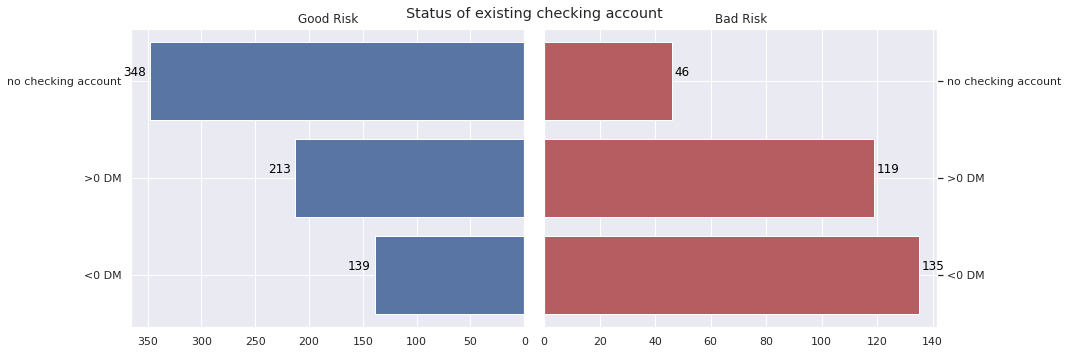

In [ ]:
visualize_distribution("Status of existing checking account")

**Credit History**

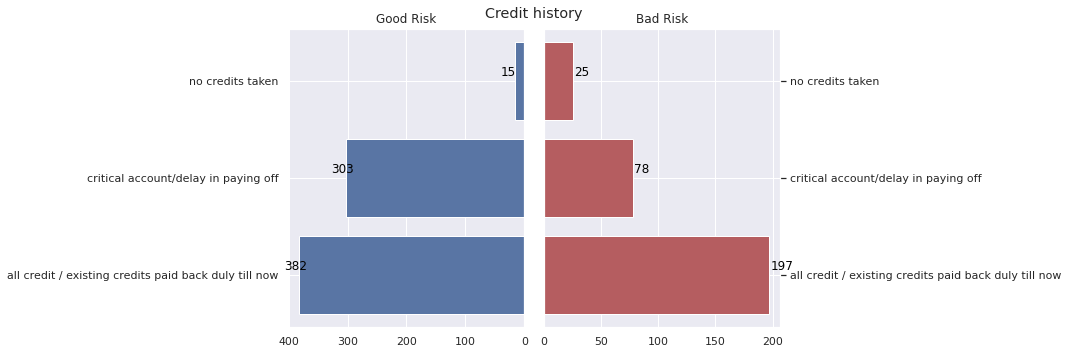

In [ ]:
visualize_distribution("Credit history")

**Purpose**

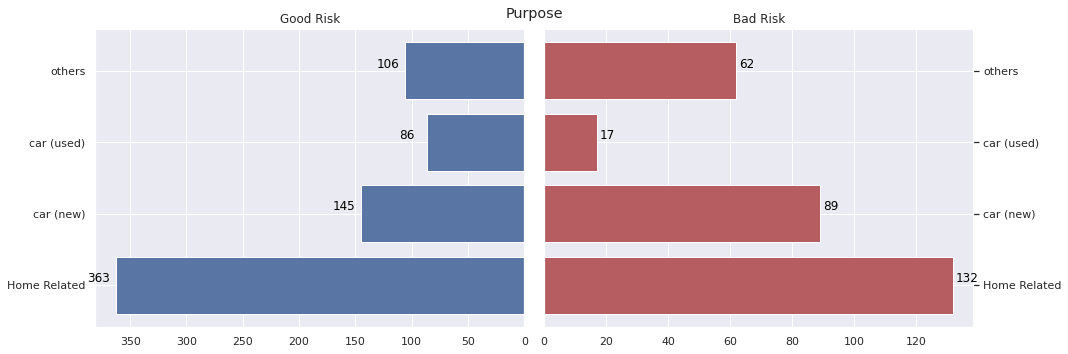

In [ ]:
visualize_distribution("Purpose")

**Savings account/bonds**

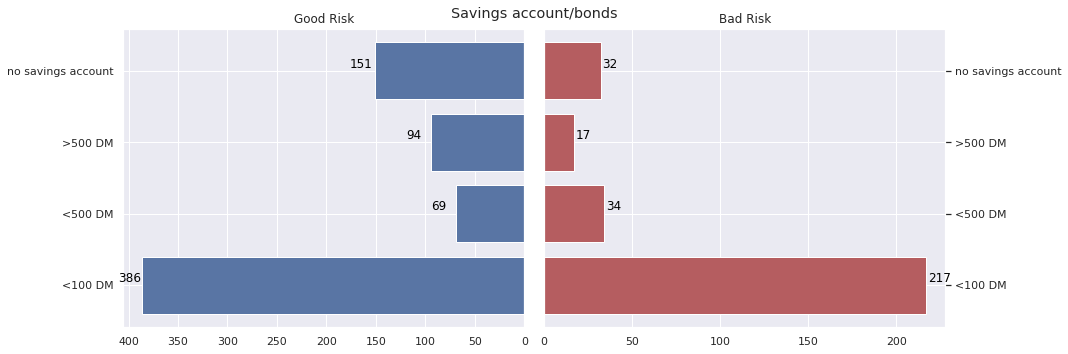

In [ ]:
visualize_distribution("Savings account/bonds")

**Present employment since**

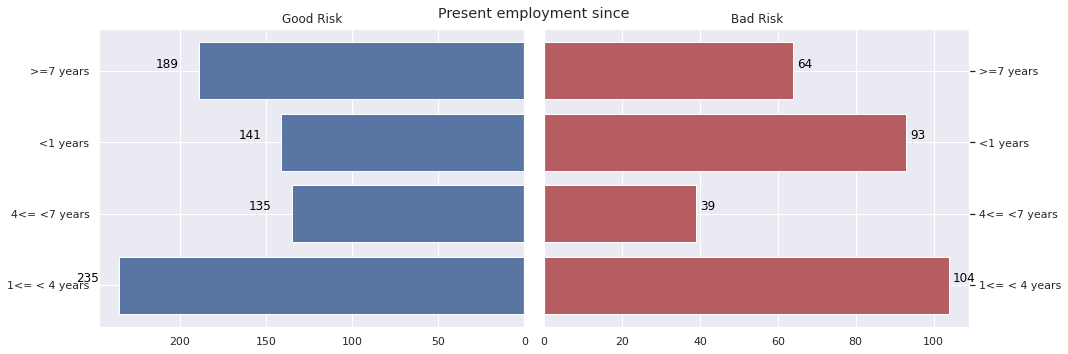

In [ ]:
visualize_distribution("Present employment since")

**Installment rate in percentage of disposable income**

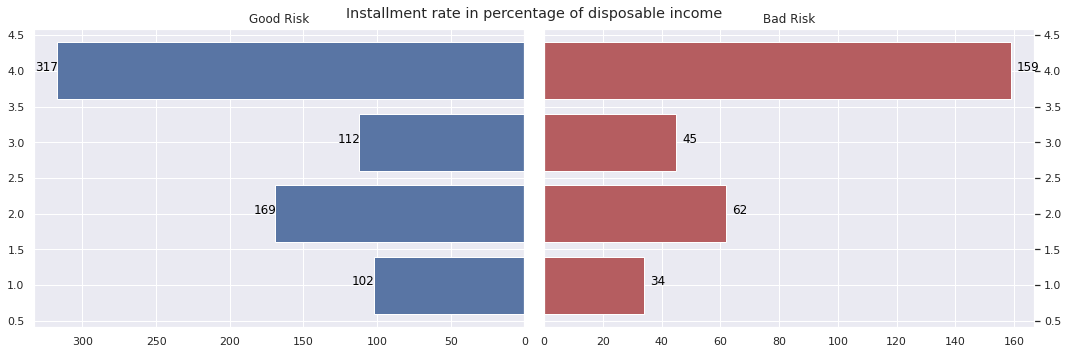

In [ ]:
visualize_distribution("Installment rate in percentage of disposable income")

**Personal status and sex**

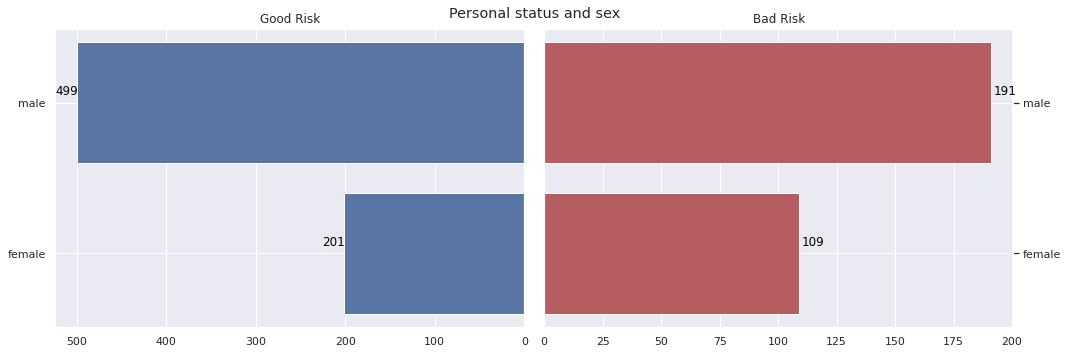

In [ ]:
visualize_distribution("Personal status and sex")

**Other deptors / guarantors**

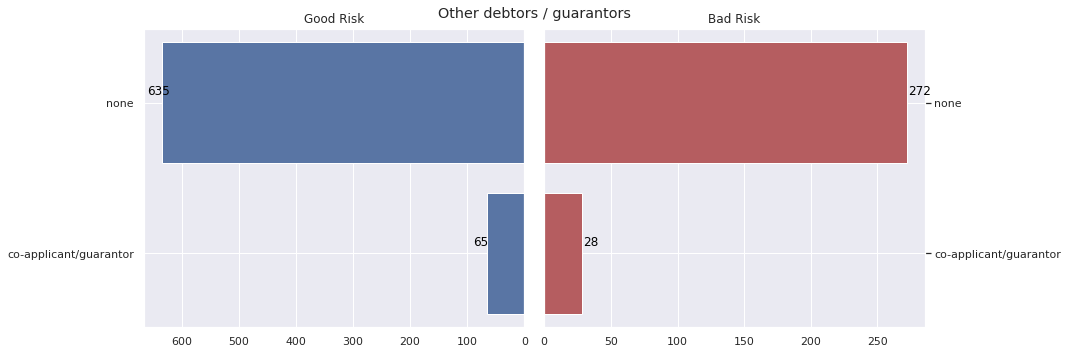

In [ ]:
visualize_distribution("Other debtors / guarantors")

**Present residence since**

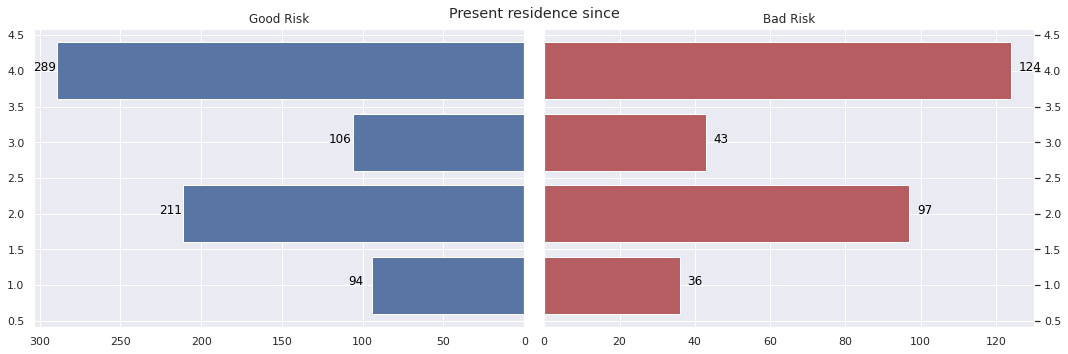

In [ ]:
visualize_distribution("Present residence since")

**Property**

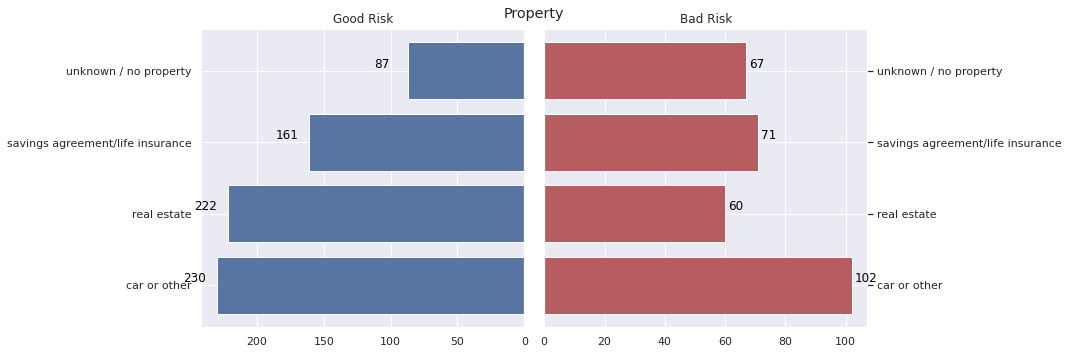

In [ ]:
visualize_distribution("Property")

**Other installment plans**

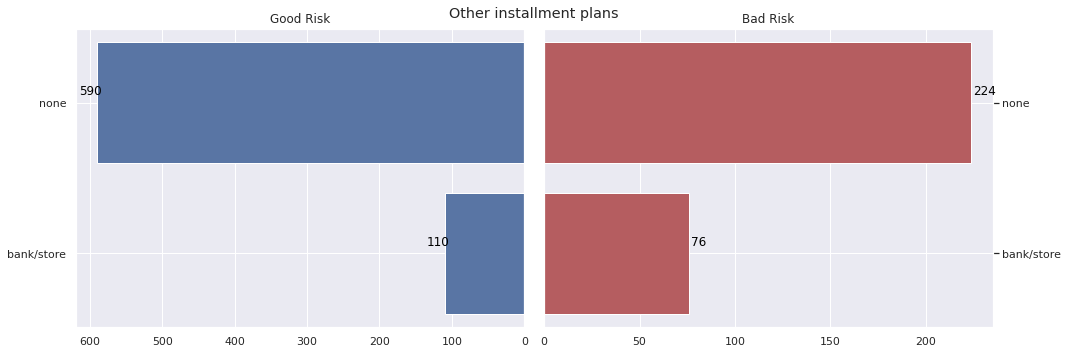

In [ ]:
visualize_distribution("Other installment plans")

**Housing**

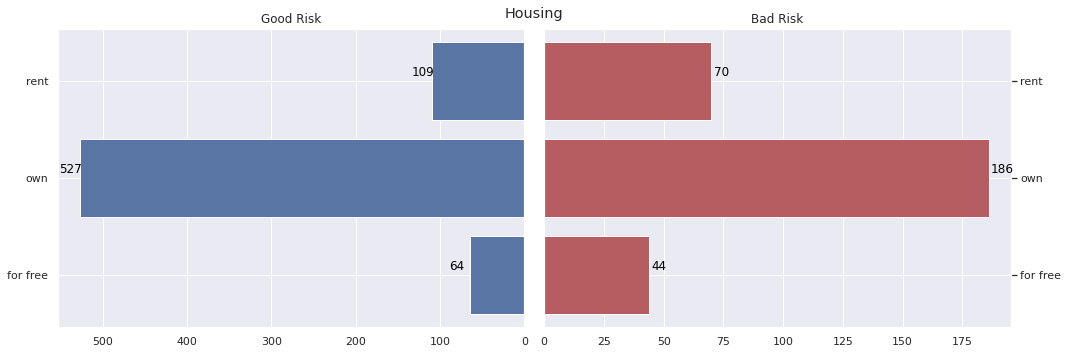

In [ ]:
visualize_distribution("Housing")

**Number of existing credits at this bank**

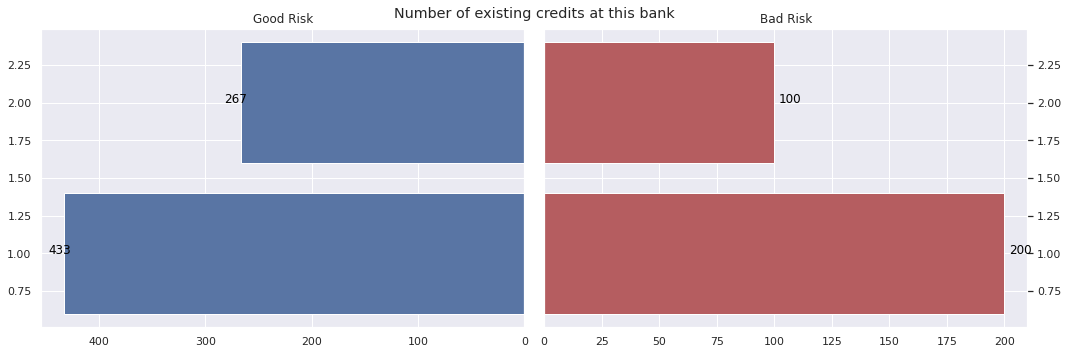

In [ ]:
visualize_distribution("Number of existing credits at this bank")

**Number of people being liable to provide maintenance for**

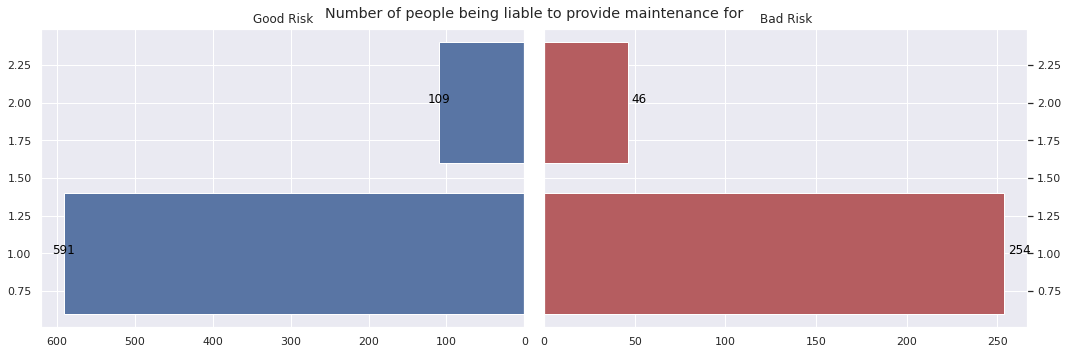

In [ ]:
visualize_distribution("Number of people being liable to provide maintenance for")

**foreign worker**

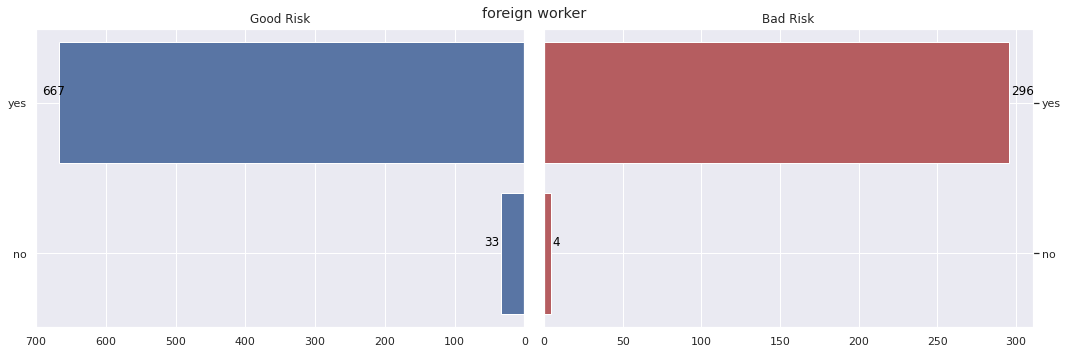

In [ ]:
visualize_distribution("foreign worker")

**Duration in year**

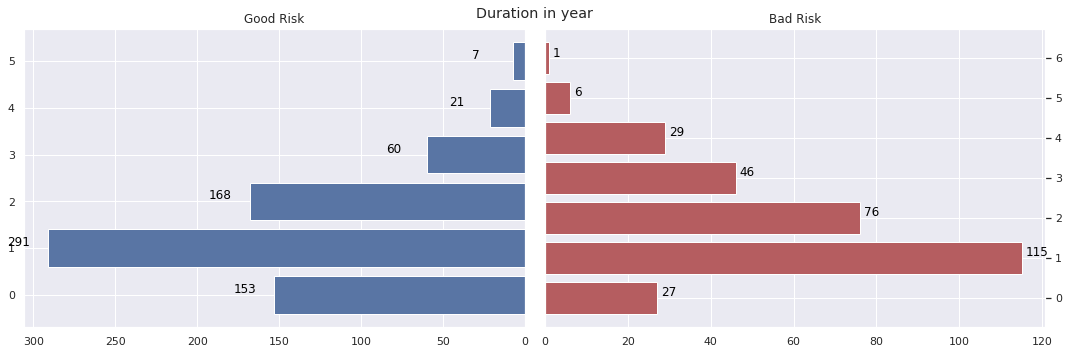

In [ ]:
from math import floor,ceil
df["Duration in year"]=df["Duration in month"].apply(lambda x: (floor(x/12)))
visualize_distribution("Duration in year")

**Age category**

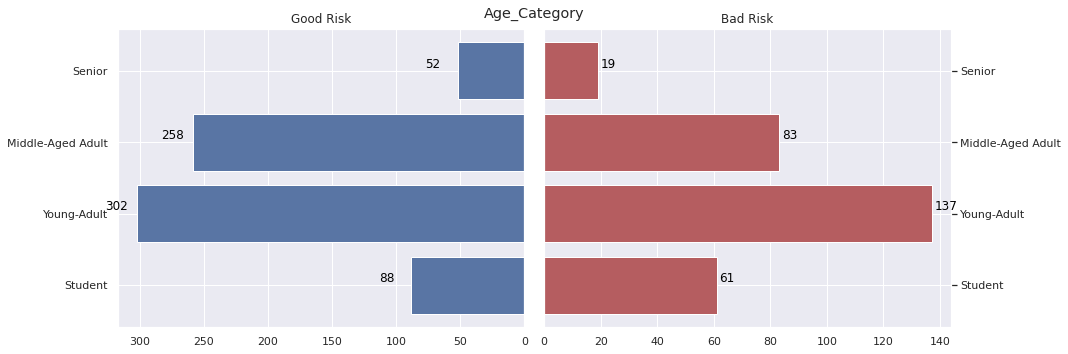

In [ ]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

**Boxplot Cost Matrix berdasarkan Numerical Variable**

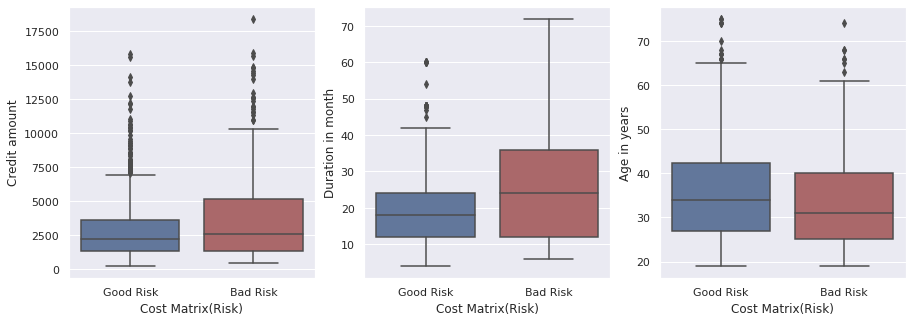

In [ ]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

**Feature Selection**

In [ ]:
from scipy import stats
import statsmodels.api as sm

column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]

statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["Cost Matrix(Risk)"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))


statistical_significance=[]
column_names_cont_stats=["Credit amount","Age in years","Duration in month"]
good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0.000000
1,Credit history,0.000000
2,Purpose,0.000050
3,Savings account/bonds,0.000000
4,Present employment since,0.000422
5,Installment rate in percentage of disposable income,0.140033
6,Personal status and sex,0.020740
7,Other debtors / guarantors,1.000000
8,Present residence since,0.861552
9,Property,0.000029


,Attribute,P-value
0,Credit amount,0.000001
1,Age in years,0.003925
2,Duration in month,0.000000


# Pre-Modelling

**Memasukkan attribut untuk modelling**

In [ ]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Cost Matrix(Risk)"]
df=df[attr_significant+target_variable]

**Membuat dummy variable untuk modelling bagging**

In [ ]:
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]
for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)
 
#mengubah target variable menjadi numeric
risk={"Good Risk":1, "Bad Risk":0}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

**Hasil dataset untuk modelling**

In [ ]:
df.head()

,Credit amount,Age in years,Duration in month,Cost Matrix(Risk),Status of existing checking account_<0 DM,Status of existing checking account_>0 DM,Status of existing checking account_no checking account,Credit history_all credit / existing credits paid back duly till now,Credit history_critical account/delay in paying off,Credit history_no credits taken,Purpose_Home Related,Purpose_car (new),Purpose_car (used),Purpose_others,Savings account/bonds_<100 DM,Savings account/bonds_<500 DM,Savings account/bonds_>500 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Personal status and sex_female,Personal status and sex_male,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank/store,Other installment plans_none,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,1169,67,6,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1,5951,22,48,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,2096,49,12,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
3,7882,45,42,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
4,4870,53,24,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1


# Analisis Dataframe German Credit dengan RandomForestClassifier (Bagging)

**Menggunakan PCA**

In [ ]:
X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
y = df["Cost Matrix(Risk)"].values #target variables

pca = PCA(n_components=16)
X = pca.fit_transform(X)

<ipython-input-342-1f2e0c0ba2a1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Cost Matrix(Risk)', 1).values #independent variables


**Train dan Test dataframe**

In [ ]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = RandomForestClassifier(n_estimators=10)
bagging_classifier = BaggingClassifier(base_estimator=base_classifier,
                                       n_estimators=10,
                                       max_samples=0.8,
                                       max_features=0.8)
# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Test the classifier
bagging_classifier.score(X_test, y_test)

0.7666666666666667

**Tentukan dan gunakan model**

karena kita melaksanakan analisis dengan bagging maka kita menggunakan RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

**Hasil Akurasi data**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))

Accuracy: 
77.33


**ROC Curve**

Probabilitas Super Vector Machine

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm

classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)

#Menghitung prediction probability dari model yang telah dibuat
svm_probs = classifier.predict_proba(X_test)
 
#Prediction probability berisi '0'
random_probs = [0 for _ in range(len(y_test))]

print(svm_probs)

[[0.29537516 0.70462484]
 [0.29519853 0.70480147]
 [0.29516461 0.70483539]
 [0.29527248 0.70472752]
 [0.39919911 0.60080089]
 [0.29558716 0.70441284]
 [0.29545353 0.70454647]
 [0.29515297 0.70484703]
 [0.2953006  0.7046994 ]
 [0.29584721 0.70415279]
 [0.30213679 0.69786321]
 [0.29523256 0.70476744]
 [0.29569696 0.70430304]
 [0.29518844 0.70481156]
 [0.295174   0.704826  ]
 [0.29514459 0.70485541]
 [0.29527816 0.70472184]
 [0.29546468 0.70453532]
 [0.29524703 0.70475297]
 [0.29524979 0.70475021]
 [0.29534372 0.70465628]
 [0.29520573 0.70479427]
 [0.2952582  0.7047418 ]
 [0.29505951 0.70494049]
 [0.29516656 0.70483344]
 [0.29561062 0.70438938]
 [0.29523176 0.70476824]
 [0.2952711  0.7047289 ]
 [0.29519154 0.70480846]
 [0.29532491 0.70467509]
 [0.29515408 0.70484592]
 [0.29521324 0.70478676]
 [0.295293   0.704707  ]
 [0.29518994 0.70481006]
 [0.29516254 0.70483746]
 [0.57669223 0.42330777]
 [0.29516907 0.70483093]
 [0.29528518 0.70471482]
 [0.29521632 0.70478368]
 [0.29527098 0.70472902]


In [ ]:
#Prediction probability berisi '1'
svm_probs = svm_probs[:,1]
print(svm_probs)

[0.70462484 0.70480147 0.70483539 0.70472752 0.60080089 0.70441284
 0.70454647 0.70484703 0.7046994  0.70415279 0.69786321 0.70476744
 0.70430304 0.70481156 0.704826   0.70485541 0.70472184 0.70453532
 0.70475297 0.70475021 0.70465628 0.70479427 0.7047418  0.70494049
 0.70483344 0.70438938 0.70476824 0.7047289  0.70480846 0.70467509
 0.70484592 0.70478676 0.704707   0.70481006 0.70483746 0.42330777
 0.70483093 0.70471482 0.70478368 0.70472902 0.70458539 0.70467465
 0.704772   0.7047086  0.7047855  0.70485282 0.70476475 0.70465624
 0.70483252 0.70478014 0.70471704 0.64501803 0.70491773 0.7047264
 0.7048012  0.70476479 0.35555177 0.7048514  0.70476634 0.70477008
 0.70398883 0.70471147 0.70479242 0.70482663 0.70473551 0.70477146
 0.70480926 0.70484162 0.70472241 0.70487682 0.70419398 0.70485693
 0.70477448 0.70481642 0.70483109 0.70479371 0.70475289 0.70464596
 0.70486432 0.70478682 0.70472256 0.70472381 0.70481797 0.70486088
 0.70487695 0.7047656  0.3221656  0.70482695 0.70472656 0.70479

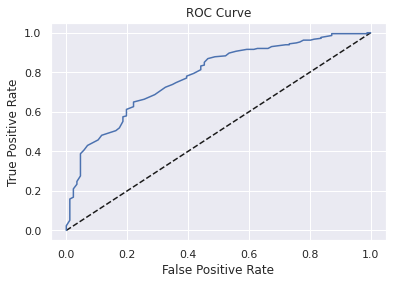

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Dari hasil ROC Curve bisa dievaluasi bahwa hasil nilai mendekati ke 0.7 (mendekati ke 1),  yang artinya model yang dibuat memiliki >70% area dibawah kurva.

# Eksperimen

In [ ]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=0)

In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = RandomForestClassifier(n_estimators=10)
bagging_classifier = BaggingClassifier(base_estimator=base_classifier,
                                       n_estimators=10,
                                       max_samples=0.8,
                                       max_features=0.8)
# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Test the classifier
bagging_classifier.score(X_test, y_test)

0.7533333333333333

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))

Accuracy: 
77.33


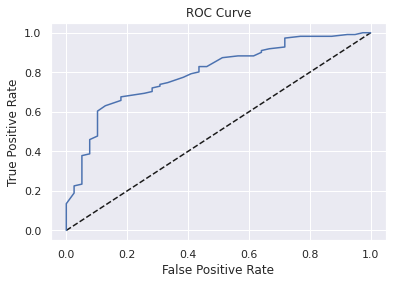

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Dari hasil eksperimen, bisa disimpulkan bahwa akurasi data semakin membaik jika test_size dikurangi